In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from PIL import Image
from multiprocessing.dummy import Pool


In [2]:
IMAGES_PATH = glob.glob('./test/test/**.**', recursive=True, )
pool = Pool(12)


In [3]:
def get_metadata(path):
    img = Image.open(path)

    return [img.mode, img.format, img.width, img.height, img.width / img.height]


In [4]:
metadata = pool.map(get_metadata, IMAGES_PATH)
pool.close()
pool.join()


In [5]:
df = pd.DataFrame(metadata, columns=['mode', 'format', 'width', 'height', 'aspect_ratio'])
df


,mode,format,width,height,aspect_ratio
0,RGB,JPEG,700,700,1.0
1,RGB,JPEG,581,581,1.0
2,RGB,JPEG,533,533,1.0
3,RGB,JPEG,660,660,1.0
4,RGB,JPEG,800,800,1.0
...,...,...,...,...,...
12187,RGB,JPEG,620,620,1.0
12188,RGB,JPEG,558,558,1.0
12189,RGB,JPEG,688,688,1.0
12190,RGB,JPEG,586,586,1.0


## Mode

In [6]:
img_mode = df['mode'].unique()
print(f'Image mode : {img_mode}')
for m in img_mode:
    print(f'Total image with mode {m} : {sum(df["mode"] == m)}')


Image mode : ['RGB']
Total image with mode RGB : 12192


## Format

In [7]:
img_format = df['format'].unique()
print(f'Image format : {img_format}')
for m in img_format:
    print(f'Total image with format {m} : {sum(df["format"] == m)}')


Image format : ['JPEG' 'PNG']
Total image with format JPEG : 12189
Total image with format PNG : 3


## Aspect Ratio

In [8]:
print(f'Total images with aspect ratio 1.0: {sum(df["aspect_ratio"] == 1.0)}')
print(f'Total images without aspect ratio 1.0: {sum(df["aspect_ratio"] != 1.0)}')
df[df['aspect_ratio'] != 1.0 ]


Total images with aspect ratio 1.0: 12188
Total images without aspect ratio 1.0: 4


,mode,format,width,height,aspect_ratio
4813,RGB,JPEG,640,480,1.333333
4824,RGB,JPEG,640,459,1.394336
8509,RGB,JPEG,1024,984,1.040650
11768,RGB,JPEG,512,640,0.800000


## Width

In [9]:
print(f'Mean width : {df["width"].mean()}')


Mean width : 704.8608103674541


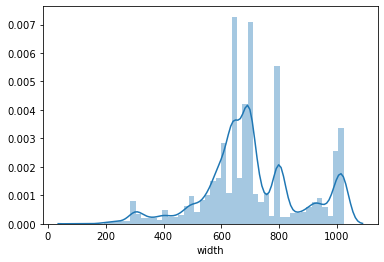

In [10]:
sns.distplot(df['width'], norm_hist=False)
